# Loading saved tweets
and using user profile description to discern political stance

In [1]:
from tqdm import tqdm
import pickle
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [181]:
#load saved tweet df
with open(r"tweets20210405.pkl", "rb") as input_file:
    tweets20210405 = pickle.load(input_file)
    
with open(r"tweets20220414.pkl", "rb") as input_file:
    tweets20220414 = pickle.load(input_file)

with open(r"tweets20220425.pkl", "rb") as input_file:
    tweets20220425 = pickle.load(input_file)
    
with open(r"tweets20220510.pkl", "rb") as input_file:
    tweets20220510 = pickle.load(input_file)

In [184]:
tweets20210405['Date'] = '20210405'
tweets20220414['Date'] = '20220414'
tweets20220425['Date'] = '20220425'
tweets20220510['Date'] = '20220510'

In [186]:
tweets_df = pd.concat([tweets20210405, tweets20220414, tweets20220425, tweets20220510], axis=0)

In [187]:
tweets_df.shape

(39999, 8)

In [177]:
#using user profile description to discern political stance

substring_list = ['Patriot', 'patriot', 'PATRIOT',
                  'Conservativ', 'conservativ', 'CONSERVATIV',
                  'America', 'america', 'AMERICA', 'USA',
                  'Freedom', 'freedom', 'FREEDOM',
                  'Trump', 'trump', 'TRUMP',
                  'Libertarian', 'libertarian', 'LIBERTARIAN', 'Liberty', 'liberty', 'LIBERTY',
                  'MAGA', 'maga', 'Maga',
                  'GOD', 'god', 'God',
                  'JESUS', 'jesus', 'Jesus',
                  'Christian', 'christian',
                  '🇺🇸']

def politic(descr):
    return any(substring in descr for substring in substring_list)

In [188]:
tweets_df['Conservative'] = tweets_df['Description'].\
                        map(lambda x: politic(x))

In [190]:
tweets_df[tweets_df['Conservative']].head()

,Datetime,Tweet Id,Text,Username,Description,US Flag,Keyword,Date,Conservative
17,2021-04-06 23:54:36+00:00,1379583349862379521,@laderechadiario Elon lo termina remontando acuerdense,Alejandromallu1,"#halamadrid \n#lamitadmas1\n\nSoy un chico capitalista, libertario, anti comunista y anti socialista, simpatizó con Trump 🇺🇸\nfiel solamente a Dios",True,#ElonMusk OR @elonmusk OR Elon Musk OR Elon OR Musk,20210405,True
86,2021-04-06 23:35:53+00:00,1379578638891425794,Had to go private so I can lament that I found out my brother is an Elon stan and I must mourn,kitty_lestrange,"SEO editor, client recovery & QA, and writer. Demi-Pan. NB. they/she. American expat. Patrilineal & hopefully converting. Fantasy and game fan. married.",False,#ElonMusk OR @elonmusk OR Elon Musk OR Elon OR Musk,20210405,True
135,2021-04-06 23:24:50+00:00,1379575858160152578,@folastag I don't understand why Elon musk now hyped it,ayojurn,Photographer | civil engineer | student | eksuite | cool | loves music | GOD fearing,False,#ElonMusk OR @elonmusk OR Elon Musk OR Elon OR Musk,20210405,True
148,2021-04-06 23:20:20+00:00,1379574724813062146,@RobertPaege @thehill How would you know if anyone is? Have you ever seen Elon Musks bank account? Maybe there’s just no billionaires based on your thought,AndrewD409,Christian • Conservative Populist • America First,False,#ElonMusk OR @elonmusk OR Elon Musk OR Elon OR Musk,20210405,True
157,2021-04-06 23:19:15+00:00,1379574454163025924,Elon https://t.co/CqKiTPg3gH,WadlleGuy,"- goin by david, wadlle or alex -\nhispanic mf(Mexican-American)\nany pronouns - big fan of my s/o - mainly rts and replys -\n\nFG's I play\nDBFZ\nSSBU\nNASB\nGG+R",False,#ElonMusk OR @elonmusk OR Elon Musk OR Elon OR Musk,20210405,True


#### Remove Stop words and @ mentions

In [2]:
#remove mentions using regex
import re

In [192]:
#example
s = '@eaijusngb_2345 @oepistnh908 @freeman_mary2 bad mean tweeter lose tedder bear mom will run canadian mist poopy @apeitogh0978 @eaijusngb_2345'
re.sub(r'(^|\s)*@[a-zA-Z0-9_]{1,15}($|\s)', '', s)

'bad mean tweeter lose tedder bear mom will run canadian mist poopy'

In [193]:
#cleaning special characters from text
#remove @ mentions
from cleantext import clean
tweets_df['CleanedText'] = tweets_df['Text'].\
        map(lambda x: clean(x, lower=False, no_line_breaks=True, no_urls=True)).\
        map(lambda x: re.sub(r'(^|\s)*@[a-zA-Z0-9_]{1,15}($|\s)', '', x))

In [194]:
tweets_df.head()

,Datetime,Tweet Id,Text,Username,Description,US Flag,Keyword,Date,Conservative,CleanedText
0,2021-04-06 23:59:44+00:00,1379584640948834310,@elonmusk #SAFEMOON is the future Elon! Join us!,bibonblous,Sempre a la contra i avant!,False,#ElonMusk OR @elonmusk OR Elon Musk OR Elon OR Musk,20210405,False,#SAFEMOON is the future Elon! Join us!
1,2021-04-06 23:59:40+00:00,1379584624221822978,"@KMadMcLean @gerrydee They also juice the numbers because each death in a private hospital gets a subsidy check from the gov. Elon Musk said this, so take it for what its worth",tjvland,,False,#ElonMusk OR @elonmusk OR Elon Musk OR Elon OR Musk,20210405,False,"They also juice the numbers because each death in a private hospital gets a subsidy check from the gov. Elon Musk said this, so take it for what its worth"
2,2021-04-06 23:59:40+00:00,1379584623999606785,@SpaceXJet Elon is in Seattle too surely something big is happening at Starlink,tumeloditle,Peace and prosperity for Africa,False,#ElonMusk OR @elonmusk OR Elon Musk OR Elon OR Musk,20210405,False,Elon is in Seattle too surely something big is happening at Starlink
3,2021-04-06 23:59:32+00:00,1379584589111382016,@stevenmarkryan elon musk because hes achieving so many things i aspire to accomplish,InertiaConcept,#bitcoin,False,#ElonMusk OR @elonmusk OR Elon Musk OR Elon OR Musk,20210405,False,elon musk because hes achieving so many things i aspire to accomplish
4,2021-04-06 23:59:26+00:00,1379584565954678786,"@Erdayastronaut @SpaceX @elonmusk Today you witnessed an explosion. Wow. Sheltered much. Musk can throw anything into the atmosphere and we have to get emissions tests on our little cars cause of pollution. Hey AstroNOT, it will end as Babel, slapped back to the ground. Sorry.",FreedomIsSlave3,Wife and mother of four. Let's get back to the Commandments,False,#ElonMusk OR @elonmusk OR Elon Musk OR Elon OR Musk,20210405,False,"Today you witnessed an explosion. Wow. Sheltered much. Musk can throw anything into the atmosphere and we have to get emissions tests on our little cars cause of pollution. Hey AstroNOT, it will end as Babel, slapped back to the ground. Sorry."


# Spacy Pipeline #1 (Sentiment Analysis)

In [3]:
import spacy

#### Language Detection

In [4]:
from spacy.language import Language
from spacy_langdetect import LanguageDetector

In [9]:
nlp = spacy.load('en_core_web_sm')
                 #, disable=['parser'])

#nlp.pipe_names

In [198]:
#add language detection pipe
#https://stackoverflow.com/questions/66712753/how-to-use-languagedetector-from-spacy-langdetect-package

def get_lang_detector(nlp, name):
    return LanguageDetector()

Language.factory("language_detector", func=get_lang_detector)

<function __main__.get_lang_detector(nlp, name)>

In [199]:
nlp.add_pipe('language_detector', last=True)

#example
text = 'This is an english text.'
doc = nlp(text)
print(doc._.language)

{'language': 'en', 'score': 0.9999965533769133}


In [200]:
tweets_df['Language'] = tweets_df['CleanedText'].\
        map(lambda x: nlp(x)._.language['language'])

In [210]:
#filter for english tweets
tweets_df_en = tweets_df[tweets_df['Language']=='en']
tweets_df_en = tweets_df_en.reset_index(drop=True)
tweets_df_en.head()

,Datetime,Tweet Id,Text,Username,Description,US Flag,Keyword,Date,Conservative,CleanedText,Language
0,2021-04-06 23:59:44+00:00,1379584640948834310,@elonmusk #SAFEMOON is the future Elon! Join us!,bibonblous,Sempre a la contra i avant!,False,#ElonMusk OR @elonmusk OR Elon Musk OR Elon OR Musk,20210405,False,#SAFEMOON is the future Elon! Join us!,en
1,2021-04-06 23:59:40+00:00,1379584624221822978,"@KMadMcLean @gerrydee They also juice the numbers because each death in a private hospital gets a subsidy check from the gov. Elon Musk said this, so take it for what its worth",tjvland,,False,#ElonMusk OR @elonmusk OR Elon Musk OR Elon OR Musk,20210405,False,"They also juice the numbers because each death in a private hospital gets a subsidy check from the gov. Elon Musk said this, so take it for what its worth",en
2,2021-04-06 23:59:40+00:00,1379584623999606785,@SpaceXJet Elon is in Seattle too surely something big is happening at Starlink,tumeloditle,Peace and prosperity for Africa,False,#ElonMusk OR @elonmusk OR Elon Musk OR Elon OR Musk,20210405,False,Elon is in Seattle too surely something big is happening at Starlink,en
3,2021-04-06 23:59:32+00:00,1379584589111382016,@stevenmarkryan elon musk because hes achieving so many things i aspire to accomplish,InertiaConcept,#bitcoin,False,#ElonMusk OR @elonmusk OR Elon Musk OR Elon OR Musk,20210405,False,elon musk because hes achieving so many things i aspire to accomplish,en
4,2021-04-06 23:59:26+00:00,1379584565954678786,"@Erdayastronaut @SpaceX @elonmusk Today you witnessed an explosion. Wow. Sheltered much. Musk can throw anything into the atmosphere and we have to get emissions tests on our little cars cause of pollution. Hey AstroNOT, it will end as Babel, slapped back to the ground. Sorry.",FreedomIsSlave3,Wife and mother of four. Let's get back to the Commandments,False,#ElonMusk OR @elonmusk OR Elon Musk OR Elon OR Musk,20210405,False,"Today you witnessed an explosion. Wow. Sheltered much. Musk can throw anything into the atmosphere and we have to get emissions tests on our little cars cause of pollution. Hey AstroNOT, it will end as Babel, slapped back to the ground. Sorry.",en


In [235]:
tweets_df_en.shape

(30137, 13)

In [ ]:
tweets_df_en['Date'] =  pd.to_datetime(tweets_df_en['Date'])

#### VADER

In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [213]:
tweets_df_en['VADER_Compound'] = tweets_df_en['CleanedText'].\
        map(lambda x: analyzer.polarity_scores(x)['compound'])

In [214]:
tweets_df_en.iloc[:5][['CleanedText','VADER_Compound']]

,CleanedText,VADER_Compound
0,#SAFEMOON is the future Elon! Join us!,0.4184
1,"They also juice the numbers because each death in a private hospital gets a subsidy check from the gov. Elon Musk said this, so take it for what its worth",-0.4588
2,Elon is in Seattle too surely something big is happening at Starlink,0.4404
3,elon musk because hes achieving so many things i aspire to accomplish,0.4215
4,"Today you witnessed an explosion. Wow. Sheltered much. Musk can throw anything into the atmosphere and we have to get emissions tests on our little cars cause of pollution. Hey AstroNOT, it will end as Babel, slapped back to the ground. Sorry.",0.5423


In [226]:
tweets_df_en.sort_values('VADER_Compound').loc[:,['CleanedText','VADER_Compound']].head(5)

,CleanedText,VADER_Compound
3081,"I had a dream about the movie- Frozen There, Elsa was Elon Musk Anna was Duggu And Olaf was David Attenborough 😱😱😱😱😱😱😱😱",-0.9914
5828,OMG Elon! You have just hurt the sentiments of the most peaceful community on the planet! How can someone be so CRUEL!!!???😱😱😱😭😭😭😭😵😵😵,-0.9913
19231,"If Elon Musk is giving us free speech then fucking every one of you you fucking fucking morons, fucking fuck fuckity fuck fuck. Violence I threaten against you, I like doing violence, yeah, fuck shit fuck cunt fuck shit.",-0.9895
15706,"That's some GOP level pettiness. I get that you hate Elon, but holy shit. This is cutting off your nose to spite your face. You don't win if Twitter and / or Tesla fail. In fact, you lose. There's nothing to gain in these companies failing.",-0.9883
22640,Everyone's talking about Elon Musk buying Twitter but no one's talking about that dumb fat bitch that got me fired last year and the coke whore with a killer sister that helped. I hope they die.,-0.9880


In [227]:
tweets_df_en.sort_values('VADER_Compound', ascending=False).loc[:,['CleanedText','VADER_Compound']].head(5)

,CleanedText,VADER_Compound
29034,"World population $8billion Elon Musk bought Twitter $44Billion If this guy share $1M each to us, baba go still get change 😄😄😄😄😄😄😄😄😄😄",0.9943
29001,"World population $8billion Elon Musk bought Twitter $44Billion If this guy share $1M each to us, baba go still get change 😄😄😄😄😄😄😄😄😄😄 <URL>",0.9943
21646,I can't believe none of y'all knew I was an Elon fan. There's lots of yt billionaires but only one Elon musk 😌😌😊😊😊😊,0.9915
24167,Is Nunez trying to put the kibosh on the Elon Musk deal? 💙💙💙💙💙💙💙💙💙👍🏼,0.9911
19938,"Hey Elon....Verify Gio...an amazing young man with a BRIGHT future who has brought lots of joy, fun and happiness with his heart felt sharing of his love of sport to us all during the pandemic. Thanks. Best of luck to all!",0.9910


In [207]:
tweets_df_en.shape

(39999, 12)

In [219]:
tweets_df_en.head(3)

,Datetime,Tweet Id,Text,Username,Description,US Flag,Keyword,Date,Conservative,CleanedText,Language,VADER_Compound
0,2021-04-06 23:59:44+00:00,1379584640948834310,@elonmusk #SAFEMOON is the future Elon! Join us!,bibonblous,Sempre a la contra i avant!,False,#ElonMusk OR @elonmusk OR Elon Musk OR Elon OR Musk,20210405,False,#SAFEMOON is the future Elon! Join us!,en,0.4184
1,2021-04-06 23:59:40+00:00,1379584624221822978,"@KMadMcLean @gerrydee They also juice the numbers because each death in a private hospital gets a subsidy check from the gov. Elon Musk said this, so take it for what its worth",tjvland,,False,#ElonMusk OR @elonmusk OR Elon Musk OR Elon OR Musk,20210405,False,"They also juice the numbers because each death in a private hospital gets a subsidy check from the gov. Elon Musk said this, so take it for what its worth",en,-0.4588
2,2021-04-06 23:59:40+00:00,1379584623999606785,@SpaceXJet Elon is in Seattle too surely something big is happening at Starlink,tumeloditle,Peace and prosperity for Africa,False,#ElonMusk OR @elonmusk OR Elon Musk OR Elon OR Musk,20210405,False,Elon is in Seattle too surely something big is happening at Starlink,en,0.4404


In [221]:
#group by date, group by conservative vs liberal
tweets_df_en.groupby(['Date', 'Conservative'])['VADER_Compound'].mean().reset_index()

,Date,Conservative,VADER_Compound
0,20210405,False,0.173061
1,20210405,True,0.145787
2,20220414,False,0.093355
3,20220414,True,0.084388
4,20220425,False,0.095615
5,20220425,True,0.131718
6,20220510,False,0.065286
7,20220510,True,0.091042


In [229]:
#Remove politically antagonizing tweets

substring_list2 = ['Libtard', 'libtard', 'LIBTARD',
                  'Liberal', 'liberal', 'LIBERAL',
                 'LEFTIST', 'leftist', 'Leftist',
                  'left wing', 'leftwing', 'left-wing', 'Left-wing',
                  'Democrat', 'democrat', 'DEMOCRAT',
                  'Conservativ', 'conservativ', 'CONSERVATIV',
                  'right wing', 'rightwing', 'right-wing', 'Right-wing',
                  'Republican', 'republican', 'REPUBLICAN'
                 ]

def attack(tweet):
    return any(substring in tweet for substring in substring_list2)

In [230]:
tweets_df_en['Attack'] = tweets_df_en['CleanedText'].\
                        map(lambda x: attack(x))

In [232]:
tweets_df_en.shape

(30137, 13)

In [234]:
tweets_df_en[~tweets_df_en['Attack']].groupby(['Date', 'Conservative'])['VADER_Compound'].mean().reset_index()

,Date,Conservative,VADER_Compound
0,20210405,False,0.173304
1,20210405,True,0.144464
2,20220414,False,0.091543
3,20220414,True,0.081203
4,20220425,False,0.096991
5,20220425,True,0.137316
6,20220510,False,0.066262
7,20220510,True,0.094028


In [236]:
#saving df
with open('tweets_df_en.pkl', 'wb') as handle:
    pickle.dump(tweets_df_en, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Spacy Pipeline #2 Topic Modeling

#### Spell Check
(skipped)

In [2]:
from symspellpy import SymSpell

In [5]:
# #download jamspell english package
# import requests
# URL = "https://raw.githubusercontent.com/wolfgarbe/SymSpell/master/SymSpell/frequency_dictionary_en_82_765.txt"
# # 2. download the data behind the URL
# response = requests.get(URL)
# # 3. Open the response into a new file called instagram.ico
# open("frequency_dictionary_en_82_765.txt", "wb").write(response.content)

1332881

In [6]:
# #prepping spellchecker
# symsp = SymSpell()
# symsp.load_dictionary('frequency_dictionary_en_82_765.txt',\
#                       term_index=0, \
#                       count_index=1, \
#                       separator=' ')

True

In [81]:
# def spellchecker(doc):
    
#     terms = symsp.lookup_compound(doc,
#         max_edit_distance=2) 
#     return terms[0].term

## SPACY preprocessing

In [6]:
#load saved tweet df
with open(r"tweets_df_en.pkl", "rb") as input_file:
    tweets_df_en = pickle.load(input_file)

In [7]:
#remove stop words
from spacy.lang.en.stop_words import STOP_WORDS

In [97]:
#Customize stop words

#stopwords = nlp.Defaults.stop_words

# print(len(stopwords))

# #add new stop words
# nlp.Defaults.stop_words.add("my_new_stopword")
#nlp.Defaults.stop_words |= {"Afham","Farden"}

# #remove stop words
# nlp.Defaults.stop_words.remove("what")
# nlp.Defaults.stop_words -= {"who", "when"}

# # My custom list of stop words.
stop_list = ["Elon", "Musk", "Twitter", 'elon', 'musk', 'twitter', 'url', 'URL', 'ElonMusk', 'elonmusk', 'go', 'to', 'go to', 'like']
# # Updates spaCy's default stop words list with my additional words. 
nlp.Defaults.stop_words.update(stop_list)

# Iterates over the words in the stop words list and resets the "is_stop" flag.
for word in STOP_WORDS:
    lexeme = nlp.vocab[word]
    lexeme.is_stop = True

In [98]:
'like' in nlp.Defaults.stop_words

True

In [99]:
#remove stop word, lemmatization

def preprocess(doc):

    sent_cleaned = ''
    for token in nlp(doc):
        if not token.is_stop:
            if not token.pos_ == 'PUNCT':
                sent_cleaned += token.lemma_.lower()
                sent_cleaned += ' '
    sent_cleaned = sent_cleaned.strip()
    return sent_cleaned

In [100]:
#remove stop word, lemmatization
# processed = tqdm(tweets_df_en['CleanedText'].\
#         map(lambda x: preprocess(x)))
#         #map(lambda x: spellchecker(x)).\ not including spellchecker since it changes Elon to Leon
processed=[]
for tweet in tqdm(tweets_df_en['CleanedText']):
    processed.append(preprocess(tweet))

100%|███████████████████████████████████| 30137/30137 [02:08<00:00, 233.82it/s]


In [101]:
len(processed)

30137

In [113]:
#somehow 'go' and 'to' are not removed in some strings. removing manually...

processed = [x.replace(' go ', ' ').replace(' to ', ' ').replace(' say ', ' ') for x in processed]

In [114]:
for i in processed[:100]:
    if (' go ' in i) or (' to ' in i):
        print(i)

## TF-IDF

In [103]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, TruncatedSVD

In [166]:
# #count vectorization
# vectorizer = CountVectorizer(stop_words = 'english')
# doc_term = vectorizer.fit_transform(processed)
# ex_label = [e[:50]+"..." for e in processed]

In [167]:
# doc_term_df = pd.DataFrame(doc_term.toarray(), index=ex_label, columns=vectorizer.get_feature_names())

C:\Users\Josh_Wang\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [115]:
#TF-IDF
#limit max features for performance
tv = TfidfVectorizer(stop_words=None, ngram_range=(1,2), max_features=10000)
tv_out = tv.fit_transform(processed)

In [116]:
tfidf = pd.DataFrame(tv_out.toarray(), columns=tv.get_feature_names())

In [117]:
tfidf.head(5)

,00,000,000 000,000 people,000 year,01,02,04,04 2021,04 2022ad,...,yu,yup,zero,zil,zone,zoom,zuck,zuckerberg,zuckerberg own,zuckerburg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## NMF

In [164]:
nmf = NMF(4, init = "nndsvda")
nmf.fit(tfidf)

NMF(init='nndsvda', n_components=4)

In [165]:
#saving nmf
with open('fitted_nmf.pkl', 'wb') as handle:
    pickle.dump(nmf, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [166]:
topic_term = nmf.components_.round(3)

topic_term_df = pd.DataFrame(topic_term.round(3),
                index = ["component_1", "component_2", "component_3", "component_4"],
                columns = tv.get_feature_names())


C:\Users\Josh_Wang\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [167]:
topic_term_df

,00,000,000 000,000 people,000 year,01,02,04,04 2021,04 2022ad,...,yu,yup,zero,zil,zone,zoom,zuck,zuckerberg,zuckerberg own,zuckerburg
component_1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,...,0.000,0.001,0.007,0.000,0.005,0.000,0.000,0.004,0.002,0.000
component_2,0.003,0.003,0.001,0.001,0.000,0.000,0.000,0.001,0.000,0.0,...,0.000,0.008,0.002,0.002,0.000,0.000,0.006,0.002,0.000,0.000
component_3,0.005,0.044,0.005,0.005,0.003,0.001,0.001,0.005,0.003,0.0,...,0.002,0.009,0.019,0.001,0.005,0.004,0.008,0.024,0.002,0.003
component_4,0.001,0.001,0.001,0.001,0.000,0.000,0.000,0.000,0.000,0.0,...,0.000,0.001,0.000,0.000,0.000,0.000,0.002,0.000,0.000,0.000


In [168]:
# Function to display the top n terms in each topic
def display_topics(model, feature_names, no_top_words, topic_names = None): 
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix + 1)
        else:
            print("\nTopic: ", topic_names[ix])
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    print("\n")
    return model, feature_names, no_top_words

In [169]:
output = display_topics(nmf, tv.get_feature_names(), 15)
### END SOLUTION
output;


Topic  1
speech, free, free speech, freedom, want, freedom speech, platform, want free, block, support free, allow, support, right, believe, bring free

Topic  2
buy, want buy, buy luna, luna, bring, want, billion, buy tesla, stock, offer buy, offer, buy buy, try buy, instead, company

Topic  3
think, people, know, want, tesla, tweet, money, good, need, trump, thing, work, right, world, time

Topic  4
thank, god, support, bless, thank support, god bless, internet, fight, myanmar, starlink, whatshappeninginmyanmar, myanmar starlink, internet access, apr5coup, access myanmar




C:\Users\Josh_Wang\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [170]:
#mapping topics to each tweet
doc_topic_nmf = nmf.transform(tfidf)

In [125]:
doc_topic_nmf_df = pd.DataFrame(doc_topic_nmf.round(5), columns = ["free speech", "buy stocks and crypto", 'unknown', 'thankful'])
doc_topic_nmf_df['Text'] = tweets_df_en['CleanedText']
doc_topic_nmf_df

,free speech,buy stocks and crypto,unknown,thankful,Text
0,0.00000,0.00167,0.00773,0.00144,#SAFEMOON is the future Elon! Join us!
1,0.00000,0.00000,0.02581,0.00000,"They also juice the numbers because each death in a private hospital gets a subsidy check from the gov. Elon Musk said this, so take it for what its worth"
2,0.00000,0.00003,0.01733,0.00788,Elon is in Seattle too surely something big is happening at Starlink
3,0.00000,0.00000,0.01634,0.00000,elon musk because hes achieving so many things i aspire to accomplish
4,0.00000,0.00018,0.01816,0.00093,"Today you witnessed an explosion. Wow. Sheltered much. Musk can throw anything into the atmosphere and we have to get emissions tests on our little cars cause of pollution. Hey AstroNOT, it will end as Babel, slapped back to the ground. Sorry."
...,...,...,...,...,...
30132,0.00000,0.00000,0.00386,0.00000,That's the goal Elon! <URL>
30133,0.00000,0.00027,0.00224,0.00063,"Dear Elon, Twitter se kuch ch*tiyon ka blue tick wapas le lo."
30134,0.00017,0.00000,0.00704,0.00017,First human elon
30135,0.00075,0.00000,0.07749,0.00000,You are 99.99% right.. He likes inteligent people and inovator like Elon and like to do business with them.Left side and right side want Trump just to fullfill their emty lives with entertaiment Literally who cares


In [184]:
doc_topic_nmf_df.sort_values('unknown', ascending = False).head(20)

,free speech,buy stocks and crypto,unknown,thankful,Text
21791,0.0,0.0,0.13165,0.0,"Does Elon Musk like Smowl, the people's Moonbird? Hoot-hoot Elon <URL>"
2547,0.0,0.0,0.10833,0.0,Elon musk would like this
28274,0.0,0.0,0.10833,0.0,"like, perhaps Elon will not preside over twitsville after all"
1213,0.0,0.0,0.10833,0.0,Elon its not like that
22524,0.0,0.0,0.10833,0.0,Im so temtped to just go up to elon musk and be like.... <URL>
17951,0.0,0.0,0.10833,0.0,Elon isn't like the others though.
11704,0.0,0.0,0.10833,0.0,"How do you like it, Elon Musk? <URL>"
8275,0.0,0.0,0.10833,0.0,It's really a must like Elon
25462,0.0,0.0,0.09648,0.0,Elon do you really like Uyghur work?
5065,0.0,0.0,0.09582,0.0,What do you think of Elon musk's spaceman?


## LSA

In [134]:
lsa = TruncatedSVD(4)
doc_topic_lsa = lsa.fit_transform(tfidf)
lsa.explained_variance_ratio_

array([0.00406607, 0.00585381, 0.00380122, 0.00340938])

In [135]:
#saving lsa
with open('fitted_lsa.pkl', 'wb') as handle:
    pickle.dump(lsa, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [136]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["component_1","component_2","component_3","component_4"],
             columns = tv.get_feature_names())
topic_word

C:\Users\Josh_Wang\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,000 000,000 people,000 year,01,02,04,04 2021,04 2022ad,...,yu,yup,zero,zil,zone,zoom,zuck,zuckerberg,zuckerberg own,zuckerburg
component_1,0.001,0.008,0.001,0.001,0.001,0.0,0.0,0.001,0.000,0.0,...,0.0,0.003,0.005,0.000,0.002,0.001,0.002,0.005,0.001,0.001
component_2,0.001,0.005,0.001,0.001,0.000,0.0,0.0,0.001,0.000,0.0,...,0.0,0.002,0.001,0.001,-0.000,0.000,0.002,0.002,-0.000,0.000
component_3,-0.001,-0.011,-0.001,-0.001,-0.001,-0.0,-0.0,-0.001,-0.001,-0.0,...,-0.0,-0.001,-0.004,0.000,-0.001,-0.001,-0.001,-0.005,-0.000,-0.001
component_4,0.000,0.002,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,...,-0.0,-0.000,-0.000,0.000,-0.001,0.000,0.000,-0.000,-0.000,0.000


In [137]:
display_topics(lsa, tv.get_feature_names(), 8);


Topic  1
buy, speech, free, free speech, want, people, think, know

Topic  2
buy, tesla, money, think, want buy, billion, buy luna, stock

Topic  3
buy, free, speech, free speech, buy luna, luna, want buy, buy buy

Topic  4
thank, god, tesla, support, americans, love, tweet, bless




C:\Users\Josh_Wang\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [140]:
doc_topic_lsa_df = pd.DataFrame(doc_topic_lsa.round(5), columns = ["free speech", "buy stocks and crypto", 'free speech and buy crypto', 'thankful'])
doc_topic_lsa_df['Text'] = tweets_df_en['CleanedText']
doc_topic_lsa_df

,free speech,buy stocks and crypto,free speech and buy crypto,thankful,Text
0,0.01848,0.00896,-0.01736,0.00253,#SAFEMOON is the future Elon! Join us!
1,0.03288,0.01181,-0.03706,-0.00206,"They also juice the numbers because each death in a private hospital gets a subsidy check from the gov. Elon Musk said this, so take it for what its worth"
2,0.03728,0.01157,-0.04579,0.02287,Elon is in Seattle too surely something big is happening at Starlink
3,0.02432,0.00586,-0.03148,-0.01549,elon musk because hes achieving so many things i aspire to accomplish
4,0.03560,0.01433,-0.04429,0.00233,"Today you witnessed an explosion. Wow. Sheltered much. Musk can throw anything into the atmosphere and we have to get emissions tests on our little cars cause of pollution. Hey AstroNOT, it will end as Babel, slapped back to the ground. Sorry."
...,...,...,...,...,...
30132,0.00701,0.00078,-0.00994,-0.00274,That's the goal Elon! <URL>
30133,0.00481,0.00228,-0.00577,0.00243,"Dear Elon, Twitter se kuch ch*tiyon ka blue tick wapas le lo."
30134,0.01394,0.00187,-0.01721,-0.00136,First human elon
30135,0.11605,0.02085,-0.10914,-0.02596,You are 99.99% right.. He likes inteligent people and inovator like Elon and like to do business with them.Left side and right side want Trump just to fullfill their emty lives with entertaiment Literally who cares


In [190]:
doc_topic_lsa_df.sort_values('thankful', ascending = False)

,free speech,buy stocks and crypto,free speech and buy crypto,thankful,Text
29182,0.07454,-0.02005,-0.08174,0.85159,thank you elon
26493,0.07454,-0.02005,-0.08174,0.85159,Thank You Elon!!!
5479,0.07454,-0.02005,-0.08174,0.85159,thanks elon <URL>
27162,0.07454,-0.02005,-0.08174,0.85159,Thanks Elon
17072,0.07454,-0.02005,-0.08174,0.85159,We must thank Elon Musk
...,...,...,...,...,...
3501,0.15830,0.04890,-0.29136,-0.30939,And you think Elon can't?
5986,0.15830,0.04890,-0.29136,-0.30939,Elon Musk i think <URL>
19023,0.15830,0.04890,-0.29136,-0.30939,I really thought you were Elon...
28956,0.15830,0.04890,-0.29136,-0.30939,Elon think about it 😎


## LDA
Result not great. Not used.

In [171]:
from gensim import corpora, models, matutils

In [173]:
tv_term_doc=tv_out.transpose()
corpus = matutils.Sparse2Corpus(tv_term_doc)

id2word = dict((v, k) for k, v in tv.vocabulary_.items())
lda = models.LdaModel(corpus=corpus, num_topics=4, id2word=id2word, passes=10)

In [174]:
lda.print_topics()

[(0,
  '0.022*"trump" + 0.010*"ban" + 0.010*"man" + 0.009*"worker" + 0.008*"work" + 0.008*"say" + 0.008*"donald" + 0.007*"donald trump" + 0.006*"chinese" + 0.006*"americans"'),
 (1,
  '0.009*"thank" + 0.006*"need" + 0.005*"tesla" + 0.005*"know" + 0.005*"support" + 0.005*"takeover" + 0.004*"buy" + 0.004*"fight" + 0.004*"make" + 0.004*"reply"'),
 (2,
  '0.012*"speech" + 0.012*"free" + 0.010*"buy" + 0.009*"free speech" + 0.006*"good" + 0.005*"tweet" + 0.005*"thing" + 0.004*"right" + 0.004*"freedom" + 0.004*"think"'),
 (3,
  '0.007*"think" + 0.006*"people" + 0.006*"fuck" + 0.005*"want" + 0.005*"love" + 0.005*"money" + 0.005*"buy" + 0.005*"stock" + 0.004*"get" + 0.004*"take"')]

In [136]:
#turn topic 0 result to data frame
x = lda.show_topics()
for tp in x[:1]:
    biglist=[]
    for i in tp[1].split('+'):
        biglist.append([k.strip().strip('"') for k in i.split('*')])

In [137]:
topic0df = pd.DataFrame(biglist)

In [138]:
topic0df

,0,1
0,0.003,seriously
1,0.003,buy
2,0.002,man
3,0.002,money
4,0.002,big
5,0.002,think
6,0.002,free speech
7,0.002,free
8,0.002,invest
9,0.002,speech


In [262]:
doc_topic = [doc for doc in lda[corpus]]

In [268]:
doc_topic[:3]

[[(0, 0.8732623), (1, 0.042037796), (2, 0.042343963), (3, 0.04235595)],
 [(0, 0.059106246), (1, 0.8230351), (2, 0.058854356), (3, 0.05900431)],
 [(0, 0.047458686), (1, 0.047257353), (2, 0.04734505), (3, 0.8579389)]]

In [277]:
doc_topic_clean=[]
for doc in doc_topic:
    doc_topic_clean.append([topic[1] for topic in doc])

In [280]:
doc_topic_df = pd.DataFrame(doc_topic_clean)
doc_topic_df.head()

,0,1,2,3
0,0.873262,0.042038,0.042344,0.042356
1,0.059106,0.823035,0.058854,0.059004
2,0.047459,0.047257,0.047345,0.857939
3,0.043632,0.043369,0.870263,0.042737
4,0.872782,0.042510,0.042574,0.042134


In [290]:
doc_topic_df['Text'] = testdf_en['CleanedText']

In [291]:
doc_topic_df.shape

(89, 5)

# Sentiment Visualization

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

In [250]:
sentiment_df = tweets_df_en[~tweets_df_en['Attack']].groupby(['Date', 'Conservative'])['VADER_Compound'].mean().reset_index()

In [256]:
sentiment_df['Date'] = sentiment_df['Date'].astype(str)

In [257]:
sentiment_df

,Date,Conservative,VADER_Compound
0,2021-04-05,False,0.173304
1,2021-04-05,True,0.144464
2,2022-04-14,False,0.091543
3,2022-04-14,True,0.081203
4,2022-04-25,False,0.096991
5,2022-04-25,True,0.137316
6,2022-05-10,False,0.066262
7,2022-05-10,True,0.094028


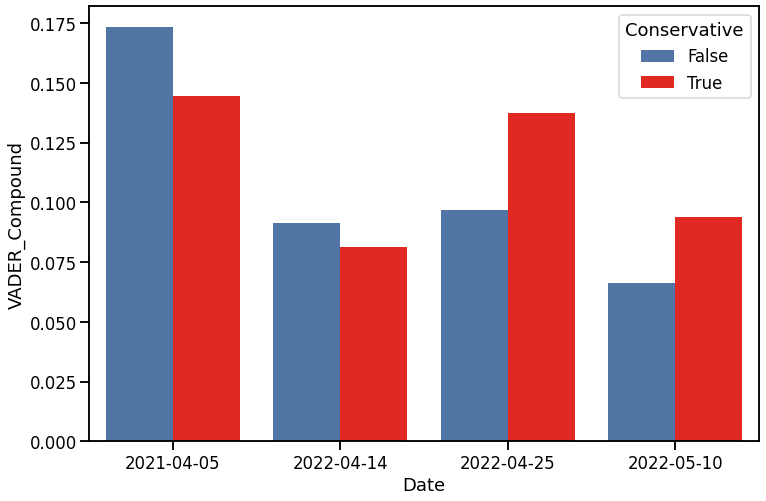

In [284]:
# Create an array with the colors you want to use
colors = ["#4374B3", "#FF0B04"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

sns.set_context("talk")

fig = plt.figure(figsize = (12,8))

ax = sns.barplot(x = 'Date',
            y = 'VADER_Compound',
            hue = 'Conservative',
            data = sentiment_df)
#plt.xticks(rotation=45)

ax.figure.savefig("sentiment.png",
                      bbox_inches="tight")
#plt.show()

# Topic Visualization (NMF)

In [318]:
doc_topic_df = pd.DataFrame(doc_topic_nmf.round(5), columns = ["free speech", "buy stocks and crypto", 'unknown', 'thankful'])
doc_topic_df['Text'] = tweets_df_en['CleanedText']
doc_topic_df['Date'] = tweets_df_en['Date'].astype(str)
doc_topic_df.head()

,free speech,buy stocks and crypto,unknown,thankful,Text,Date
0,0.0,0.00150,0.00825,0.00142,#SAFEMOON is the future Elon! Join us!,2021-04-05
1,0.0,0.00029,0.01668,0.00000,"They also juice the numbers because each death in a private hospital gets a subsidy check from the gov. Elon Musk said this, so take it for what its worth",2021-04-05
2,0.0,0.00000,0.01822,0.00776,Elon is in Seattle too surely something big is happening at Starlink,2021-04-05
3,0.0,0.00000,0.01345,0.00000,elon musk because hes achieving so many things i aspire to accomplish,2021-04-05
4,0.0,0.00000,0.01900,0.00078,"Today you witnessed an explosion. Wow. Sheltered much. Musk can throw anything into the atmosphere and we have to get emissions tests on our little cars cause of pollution. Hey AstroNOT, it will end as Babel, slapped back to the ground. Sorry.",2021-04-05


In [319]:
topic_df = doc_topic_df.groupby('Date')[["free speech", "buy stocks and crypto", 'unknown', 'thankful']].mean()

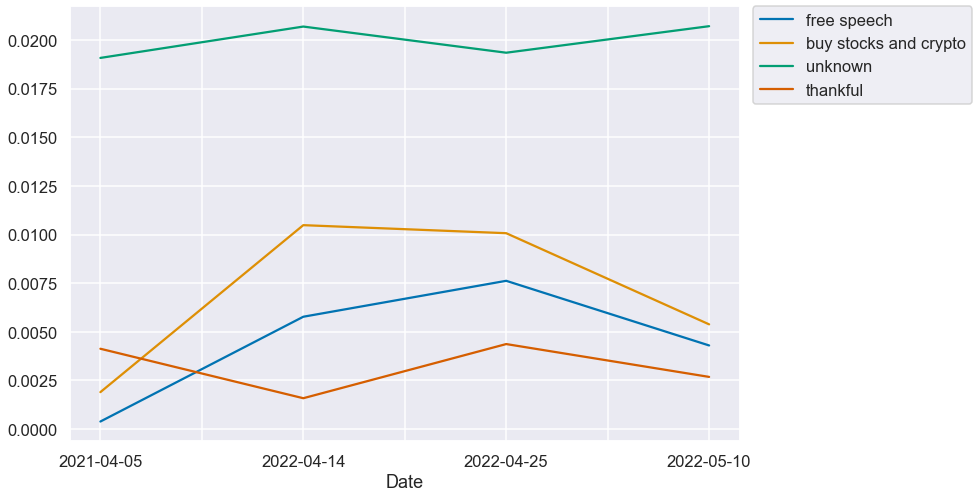

In [321]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.set_context("talk")
sns.set_palette(sns.color_palette(palette='colorblind'))
ax = topic_df.plot(kind="line")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.figure.savefig("topic_NMF.png",
                      bbox_inches="tight")

# Topic Visualization (LSA)

In [322]:
doc_topic_df = pd.DataFrame(doc_topic_lsa.round(5), columns = ["free speech", "buy stocks and crypto", 'free speech and buy crypto', 'thankful'])
doc_topic_df['Text'] = tweets_df_en['CleanedText']
doc_topic_df['Date'] = tweets_df_en['Date'].astype(str)
doc_topic_df.head()

,free speech,buy stocks and crypto,free speech and buy crypto,thankful,Text,Date
0,0.01848,0.00896,-0.01736,0.00253,#SAFEMOON is the future Elon! Join us!,2021-04-05
1,0.03288,0.01181,-0.03706,-0.00206,"They also juice the numbers because each death in a private hospital gets a subsidy check from the gov. Elon Musk said this, so take it for what its worth",2021-04-05
2,0.03728,0.01157,-0.04579,0.02287,Elon is in Seattle too surely something big is happening at Starlink,2021-04-05
3,0.02432,0.00586,-0.03148,-0.01549,elon musk because hes achieving so many things i aspire to accomplish,2021-04-05
4,0.03560,0.01433,-0.04429,0.00233,"Today you witnessed an explosion. Wow. Sheltered much. Musk can throw anything into the atmosphere and we have to get emissions tests on our little cars cause of pollution. Hey AstroNOT, it will end as Babel, slapped back to the ground. Sorry.",2021-04-05


In [323]:
topic_df = doc_topic_df.groupby('Date')[["free speech", "buy stocks and crypto", 'free speech and buy crypto', 'thankful']].mean()

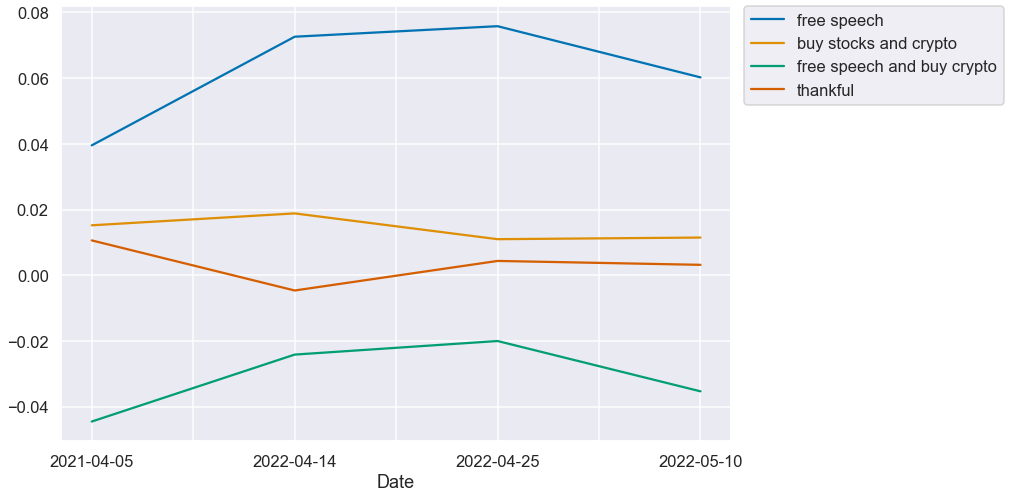

In [324]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.set_context("talk")
sns.set_palette(sns.color_palette(palette='colorblind'))
ax = topic_df.plot(kind="line")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.figure.savefig("topic_LSA.png",
                      bbox_inches="tight")

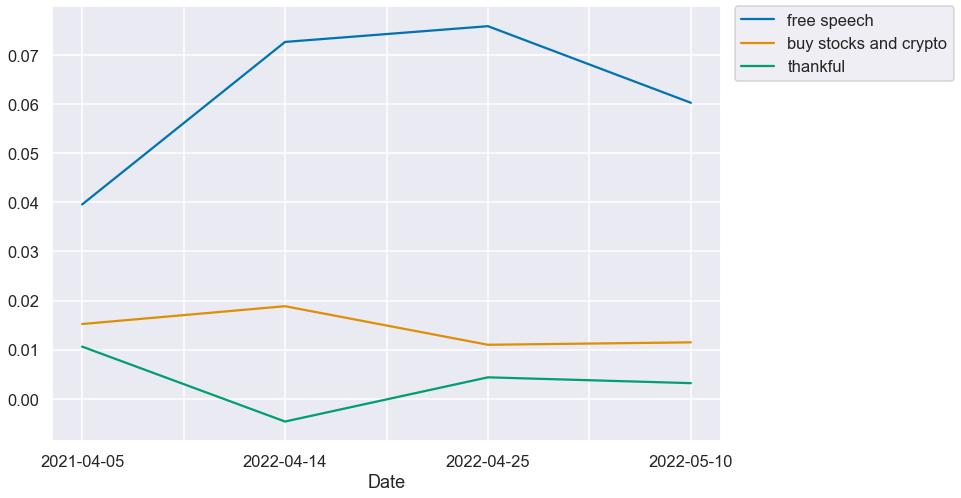

In [326]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.set_context("talk")
sns.set_palette(sns.color_palette(palette='colorblind'))
ax = topic_df[["free speech", "buy stocks and crypto", 'thankful']].plot(kind="line")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.figure.savefig("topic_LSA_drop_1.png",
                      bbox_inches="tight")

# Word Cloud Topic Visualization
Going with LSA

In [191]:
doc_topic_lsa_df.head()

,free speech,buy stocks and crypto,free speech and buy crypto,thankful,Text
0,0.01848,0.00896,-0.01736,0.00253,#SAFEMOON is the future Elon! Join us!
1,0.03288,0.01181,-0.03706,-0.00206,"They also juice the numbers because each death in a private hospital gets a subsidy check from the gov. Elon Musk said this, so take it for what its worth"
2,0.03728,0.01157,-0.04579,0.02287,Elon is in Seattle too surely something big is happening at Starlink
3,0.02432,0.00586,-0.03148,-0.01549,elon musk because hes achieving so many things i aspire to accomplish
4,0.03560,0.01433,-0.04429,0.00233,"Today you witnessed an explosion. Wow. Sheltered much. Musk can throw anything into the atmosphere and we have to get emissions tests on our little cars cause of pollution. Hey AstroNOT, it will end as Babel, slapped back to the ground. Sorry."


In [192]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
#from PIL import Image

In [193]:
font_path = "DINCondensed-Bold.ttf"
wc = WordCloud(background_color="white",max_words=25,max_font_size=60, relative_scaling=.5,
                          colormap='Dark2', scale=3, collocations=False, font_path=font_path)


In [344]:
# Helper function for printing a given wordcloud
def print_word_cloud(topic, num_of_tweets, title):
    string = doc_topic_lsa_df.sort_values(topic, ascending=False).Text[:num_of_tweets].\
            str.cat(sep=' ').upper().replace('<URL>', ' ').replace('ELON', ' ').replace('MUSK', ' ').replace('ELONMUSK', ' ')
    cloud = wc.generate(string)
    fig = plt.figure()
    fig.set_figwidth(14)
    fig.set_figheight(18)
    ax = plt.imshow(wc)
    plt.title(title, size=30).set_position([.5, 1.05])
    plt.axis('off')
    
    return fig

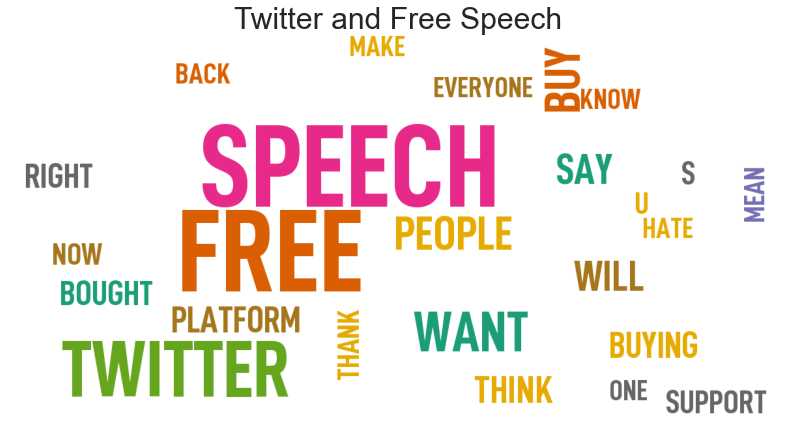

In [362]:
fig = print_word_cloud('free speech', 500, 'Twitter and Free Speech')
fig.figure.savefig("topic_free_speech.png",
                      bbox_inches="tight")

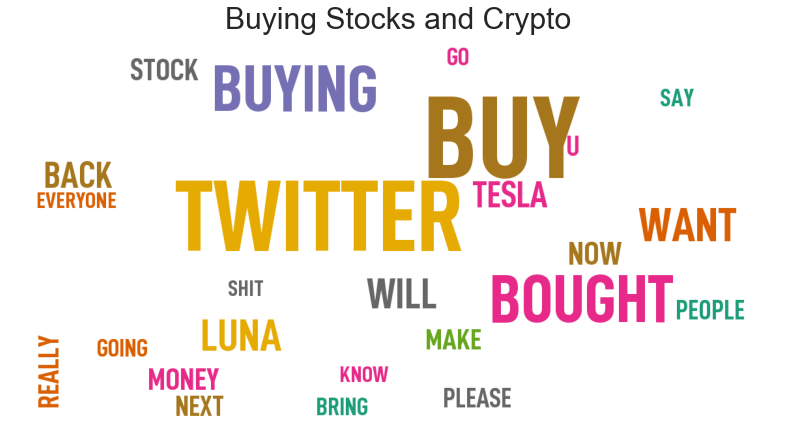

In [365]:
fig = print_word_cloud('buy stocks and crypto', 500, 'Buying Stocks and Crypto')
fig.figure.savefig("topic_buy_stock.png",
                      bbox_inches="tight")

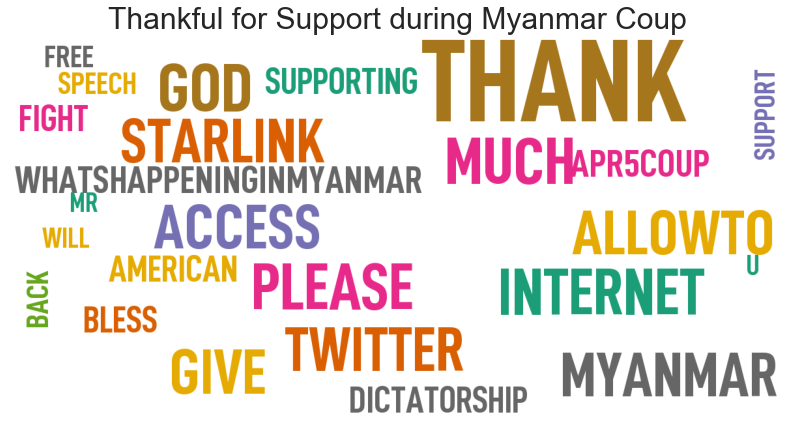

In [373]:
fig = print_word_cloud('thankful', 500, 'Thankful for Support during Myanmar Coup')
fig.figure.savefig("topic_thankful.png",
                      bbox_inches="tight")

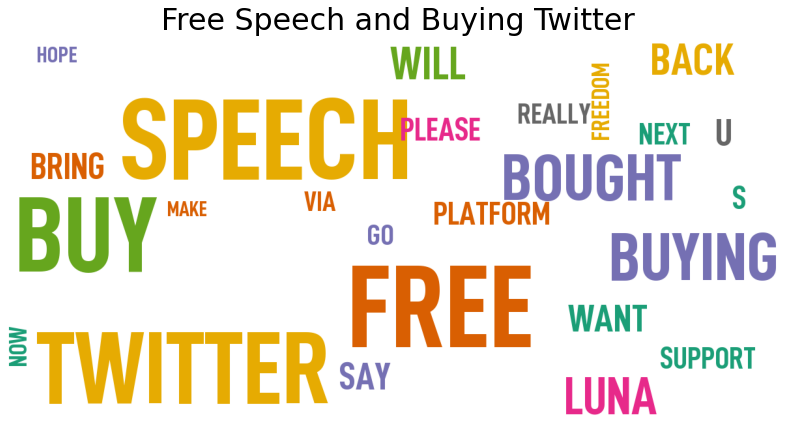

In [240]:
print_word_cloud('free speech and buy crypto', 500, 'Free Speech and Buying Twitter')